In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 2s 0us/step


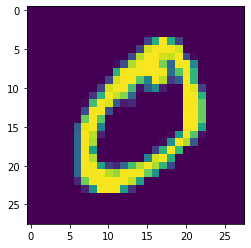

In [10]:
plt.imshow(x_train[1])
plt.show()

In [ ]:
print(x_train[10])

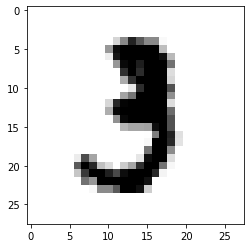

In [12]:
#changing the colour image to binary image i-e to grey image
plt.imshow(x_train[10], cmap = plt.cm.binary)
plt.show()


In [13]:
#Normalize the images to same scale
x_train= tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)

In [19]:
#bulit model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'] )


#training the model
model.fit(x_train, y_train, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 16s 267us/sample - loss: 0.2702 - accuracy: 0.9208
Epoch 2/3
60000/60000 [==============================] - 12s 198us/sample - loss: 0.1118 - accuracy: 0.9656
Epoch 3/3
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0741 - accuracy: 0.9768


In [38]:
#validating the model 
val_loss, val_acc = model.evaluate(x_test, y_test)
print("The validation loss is : ",val_loss * 100)
print("the validatio accuracy is : ", val_acc * 100)

10000/10000 [==============================] - 1s 111us/sample - loss: 0.0914 - accuracy: 0.9719
The validation loss is :  9.140335564524866
the validatio accuracy is :  97.18999862670898


In [22]:
#save the trained model so that we do not need to
#train our model again and again

model.save('mnist_cnn.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_cnn.model\assets


In [28]:
# now load the saved model and predict some values

new_model = tf.keras.models.load_model('mnist_cnn.model')


predections = new_model.predict(x_test)

In [29]:
print(predections)

[[1.6799998e-09 9.1860697e-09 1.8192791e-06 ... 9.9999177e-01
  8.5806695e-09 6.1418824e-08]
 [7.7732565e-08 6.1170041e-04 9.9938762e-01 ... 7.9191047e-08
  3.4869476e-08 2.9870710e-11]
 [6.3005596e-09 9.9983227e-01 1.1869378e-05 ... 1.6086489e-05
  1.3391180e-04 2.4115792e-07]
 ...
 [1.6715864e-09 1.0214472e-07 7.7223561e-08 ... 1.6591241e-05
  1.4845842e-06 4.0599843e-04]
 [2.4721655e-06 3.7443533e-06 1.9102002e-07 ... 4.0434000e-07
  1.9957700e-04 3.1667096e-08]
 [4.7253679e-06 1.0306948e-07 5.1778970e-06 ... 6.3628165e-11
  2.5799016e-08 2.0124549e-08]]


In [33]:
print(np.argmax(predections[10]))

0


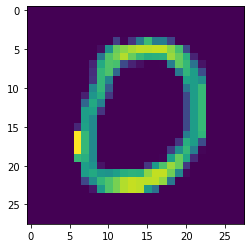

In [35]:
plt.imshow(x_test[10])
plt.show()